In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

pd.set_option('display.max_columns', None)

data = pd.read_csv('../raw_data/merged_dataframe.csv')


In [5]:
data.columns


Index(['Character_Name', 'Culture', 'Born', 'Died', 'Character_Titles',
       'Aliases', 'Father', 'Mother', 'Spouse', 'Allegiances', 'Books',
       'POV Books', 'TV Series', 'Played By', 'Character_Number',
       'Most_Common_Allegiance', 'First_Allegiance_Number', 'House_Allegiance',
       'House_Region', 'Coat of Arms', 'Words', 'Titles_y', 'Seats',
       'Current Lord', 'Heir', 'Overlord', 'Founded', 'Founder', 'Died Out',
       'Ancestral Weapons', 'Cadet Branches', 'Sworn Members',
       'Overloard_Number', 'Overlord_Name'],
      dtype='object')

In [6]:
data.drop(columns=['Born','Died','Character_Titles','Aliases','Father', 'Mother', 'Spouse','Allegiances', 'Books',
       'POV Books', 'TV Series', 'Played By','Words', 'Titles_y', 'Seats', 'Current Lord', 'Heir', 'Overlord','Founded',
       'Founder', 'Died Out','Cadet Branches', 'Sworn Members','Coat of Arms','Ancestral Weapons'],inplace=True)


In [7]:
data.set_index('Character_Number',inplace=True)


In [8]:
data.rename(columns={'First_Allegiance_Number':'Allegiance_Number'},inplace=True)


In [9]:
rows_without_character_name = data[data['Character_Name'].isnull()]
rows_without_character_name

#drop rows without character name
data.dropna(subset=['Character_Name'],inplace=True)


In [10]:
data.reset_index(drop=True, inplace=True)
data.head()


,Character_Name,Culture,Most_Common_Allegiance,Allegiance_Number,House_Allegiance,House_Region,Overloard_Number,Overlord_Name
0,Walder,NaN,House Stark of Winterfell,362.0,House Stark of Winterfell,The North,16.0,House Baratheon of King's Landing
1,Balon Greyjoy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chayle,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gillam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,High Septon,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
result = pd.DataFrame(data.groupby('Overlord_Name')['Culture'].unique())
result


,Culture
Overlord_Name,
House Arryn of the Eyrie,"[nan, Valemen, Andal, Braavosi]"
House Baelish of Harrenhal,"[nan, Rivermen, Westeros]"
House Baratheon of Dragonstone,"[nan, Valyrian, Free folk]"
House Baratheon of King's Landing,"[nan, Westeros, Stormlands, Ironborn, Valyrian..."
House Baratheon of Storm's End,"[Valyrian, nan, Westeros, Stormlands]"
House Bolton of the Dreadfort,"[Northmen, nan]"
House Cerwyn of Cerwyn,[nan]
House Darklyn of Duskendale,[nan]
House Dayne of Starfall,[Dornish]


In [12]:
character_without_overlord = data[data['Overlord_Name'].isnull()]['Character_Name']
character_without_overlord_count = len(character_without_overlord)
character_without_overlord_count


839

In [13]:
data.drop(columns=['Allegiance_Number','Overloard_Number','Most_Common_Allegiance'],inplace=True)


In [14]:
relation = data.groupby(['Culture', 'House_Allegiance', 'House_Region', 'Overlord_Name']).size().reset_index(name='Count')
relation.sort_values(by='Count',ascending=False,inplace=True)


In [15]:
print(data['House_Region'].value_counts())
data['Culture'].value_counts()


The Riverlands     236
The Reach          203
The North          180
The Westerlands    172
The Crownlands     169
Iron Islands       117
The Stormlands      98
The Vale            82
Dorne               80
None                 4
The Neck             4
Beyond the Wall      1
Name: House_Region, dtype: int64


Northmen                   137
Ironborn                   127
Free Folk                   70
Valyrian                    57
Dornish                     42
Braavosi                    41
Ghiscari                    35
Dothraki                    23
Rivermen                    22
Valemen                     20
Reach                       16
Westeros                    14
Westerman                   14
Stormlands                  10
Mountain clans               9
Tyroshi                      9
Lysene                       8
First Men                    8
Northern mountain clans      8
Andal                        8
Qartheen                     7
Summer Isles                 7
Myrish                       5
Free folk                    5
Astapori                     5
Pentoshi                     4
Meereenese                   4
Crannogmen                   4
Asshai                       3
Sistermen                    3
Norvoshi                     3
Lhazareen                    3
Rhoynar 

In [16]:
relation


,Culture,House_Allegiance,House_Region,Overlord_Name,Count
75,Northmen,House Stark of Winterfell,The North,House Baratheon of King's Landing,53
32,Ironborn,House Greyjoy of Pyke,Iron Islands,House Baratheon of King's Landing,29
13,Dornish,House Nymeros Martell of Sunspear,Dorne,House Baratheon of King's Landing,19
25,Ironborn,House Botley of Lordsport,Iron Islands,House Greyjoy of Pyke,13
68,Northmen,House Karstark of Karhold,The North,House Bolton of the Dreadfort,11
...,...,...,...,...,...
43,Ironborn,House Saltcliffe of Saltcliffe,Iron Islands,House Greyjoy of Pyke,1
42,Ironborn,House Myre of Harlaw,Iron Islands,House Harlaw of Harlaw,1
41,Ironborn,House Merlyn of Pebbleton,Iron Islands,House Greyjoy of Pyke,1
37,Ironborn,House Harlaw of the Tower of Glimmering,Iron Islands,House Harlaw of Harlaw,1


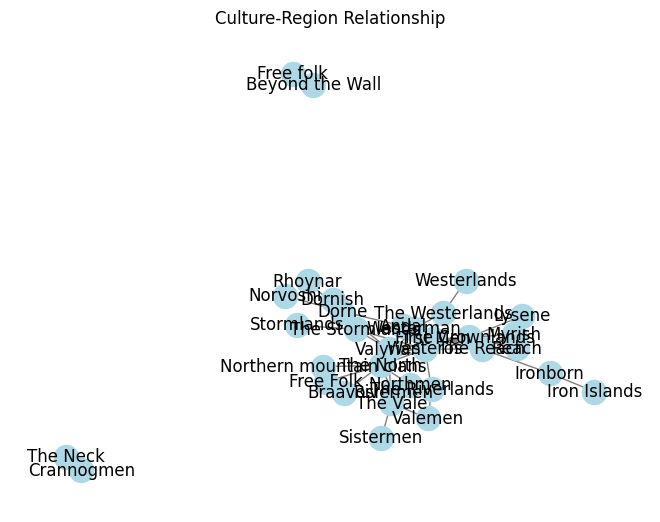

In [17]:
# Create a graph
G = nx.Graph()

# Add edges between culture and region
for index, row in relation.iterrows():
    G.add_edge(row['Culture'], row['House_Region'])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title('Culture-Region Relationship')
plt.show()
